In [1]:
from destasis import json2df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# EXCEL mit Kreis Daten
df = pd.read_excel('Geodaten_Kreise\\04-kreise.xlsx', sheet_name='Kreisfreie Städte u. Landkreise')

df = df[df["KREISE"].str.len() == 5]
df = df[["KREISE", "Kreis / Landkreis",	"Fläche", "insgesamt"]]
df

,KREISE,Kreis / Landkreis,Fläche,insgesamt
2,01001,"Flensburg, Stadt",56.73,92667.0
3,01002,"Kiel, Landeshauptstadt",118.65,248873.0
4,01003,"Lübeck, Hansestadt",214.19,219044.0
5,01004,"Neumünster, Stadt",71.66,80185.0
6,01051,Dithmarschen,1428.17,135653.0
...,...,...,...,...
466,16073,Saalfeld-Rudolstadt,1008.78,101044.0
467,16074,Saale-Holzland-Kreis,815.24,83643.0
468,16075,Saale-Orla-Kreis,1151.31,78619.0
469,16076,Greiz,845.98,95563.0


In [3]:
# Übertragung der Gruppenwerte
gruppen = [
    ['06611', '06633'],
    ['10041', '10042', '10043', '10044', '10045', '10046'],
    ['12052', '12071']
]

for gruppe in gruppen:
    val = df.loc[df['KREISE'].isin(gruppe), 'Fläche'].sum()
    df.loc[df['KREISE'].isin(gruppe), 'Fläche'] = val
    val = df.loc[df['KREISE'].isin(gruppe), 'insgesamt'].sum()
    df.loc[df['KREISE'].isin(gruppe), 'insgesamt'] = val

# Bevölerungsdichte
df['Dichte'] = df['insgesamt'] / df['Fläche']

df[df['KREISE'].isin(['10041', '10042', '10043', '10044', '10045', '10046'])]

,KREISE,Kreis / Landkreis,Fläche,insgesamt,Dichte
375,10041,Regionalverband Saarbrücken,2572.01,994424.0,386.633022
376,10042,Merzig-Wadern,2572.01,994424.0,386.633022
377,10043,Neunkirchen,2572.01,994424.0,386.633022
378,10044,Saarlouis,2572.01,994424.0,386.633022
379,10045,Saarpfalz-Kreis,2572.01,994424.0,386.633022
380,10046,St. Wendel,2572.01,994424.0,386.633022


In [18]:
#Daten laden und doppelte Aufenthalttitel löschen
df_stat = json2df("12521-0043_2024_Kreise")
df_stat = df_stat[~df_stat["RECGL3"].isin(["REC-AE-02", "REC-AE-03", "REC-AE-04", "REC-AE-05", "REC-AE-06", "REC-AE-07"])]
df_stat["Value"].sum()

np.int64(13958515)

In [5]:
df2 = df_stat.groupby(["KREISE"])["Value"].sum().reset_index()
df2 = df2.merge(df, on="KREISE")
df2["Anteil"] = df2["Value"] / df2['insgesamt'] * 100
df2

,KREISE,Value,Kreis / Landkreis,Fläche,insgesamt,Dichte,Anteil
0,01001,18345,"Flensburg, Stadt",56.73,92667.0,1633.474352,19.796691
1,01002,37130,"Kiel, Landeshauptstadt",118.65,248873.0,2097.538980,14.919256
2,01003,32085,"Lübeck, Hansestadt",214.19,219044.0,1022.662122,14.647742
3,01004,14285,"Neumünster, Stadt",71.66,80185.0,1118.964555,17.815053
4,01051,13000,Dithmarschen,1428.17,135653.0,94.983790,9.583275
...,...,...,...,...,...,...,...
395,16073,6065,Saalfeld-Rudolstadt,1008.78,101044.0,100.164555,6.002336
396,16074,4925,Saale-Holzland-Kreis,815.24,83643.0,102.599235,5.888120
397,16075,4860,Saale-Orla-Kreis,1151.31,78619.0,68.286561,6.181712
398,16076,4740,Greiz,845.98,95563.0,112.961299,4.960079


<Axes: xlabel='Dichte', ylabel='Anteil'>

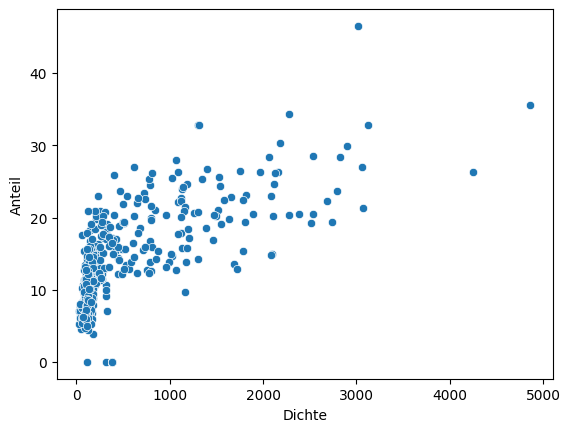

In [6]:
sns.scatterplot(df2, x="Dichte", y="Anteil")

In [13]:
df3 = df_stat.groupby(["KREISE", "Staatsangehörigkeit"])["Value"].sum().reset_index()
df3 = df3.merge(df, on="KREISE")
df3["Anteil"] = df3["Value"] / df3['insgesamt'] * 100
df3

,KREISE,Staatsangehörigkeit,Value,Kreis / Landkreis,Fläche,insgesamt,Dichte,Anteil
0,01001,Afghanistan,890,"Flensburg, Stadt",56.73,92667.0,1633.474352,0.960428
1,01001,Albanien,125,"Flensburg, Stadt",56.73,92667.0,1633.474352,0.134892
2,01001,Algerien,35,"Flensburg, Stadt",56.73,92667.0,1633.474352,0.037770
3,01001,Andorra,0,"Flensburg, Stadt",56.73,92667.0,1633.474352,0.000000
4,01001,Angola,0,"Flensburg, Stadt",56.73,92667.0,1633.474352,0.000000
...,...,...,...,...,...,...,...,...
83195,16077,Zypern,0,Altenburger Land,569.42,88692.0,155.758491,0.000000
83196,16077,Ägypten,10,Altenburger Land,569.42,88692.0,155.758491,0.011275
83197,16077,Äquatorialguinea,0,Altenburger Land,569.42,88692.0,155.758491,0.000000
83198,16077,Äthiopien,0,Altenburger Land,569.42,88692.0,155.758491,0.000000


In [9]:
sns.relplot(df3, x="Dichte", y="Anteil", col="Staatsangehörigkeit")

np.int64(13958515)

In [57]:
18192930-4291065

13901865

In [12]:
df3.to_csv("scatter_plot_anteil_dichte.csv")

In [26]:
df_corr = df3.groupby('Staatsangehörigkeit').apply(lambda x: x['Dichte'].corr(x['Anteil'])).reset_index(name='Correlation').dropna()
df_corr = df_corr.sort_values(by='Correlation', ascending=False)
df_corr

C:\Users\Clemens\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Clemens\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Clemens\AppData\Local\Temp\ipykernel_1952\2078397045.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_corr = df3.groupby('Staatsangehörigkeit').apply(lambda x: x['Dichte'].corr(x['Anteil'])).reset_index(name='Correlation').dropna()


,Staatsangehörigkeit,Correlation
162,Spanien,0.654221
148,Schweden,0.647674
61,"Iran, Islamische Republik",0.624478
22,Brasilien,0.621139
69,Jordanien,0.613777
...,...,...
183,Tschechien,-0.030626
158,Slowakei,-0.035949
94,Liberia,-0.043077
182,Tschad,-0.069180


In [24]:
df_filter = df_stat.groupby(["Staatsangehörigkeit"])["Value"].sum().reset_index()
df_filter = df_filter[df_filter["Value"]>20000]
df_filter

,Staatsangehörigkeit,Value
0,Afghanistan,441540
1,Albanien,124855
2,Algerien,24645
7,Armenien,31755
8,Aserbaidschan,37025
...,...,...
200,Vereinigtes Königreich,79400
201,Vietnam,136960
204,Ägypten,51970
206,Äthiopien,22665


In [29]:
df_corr_filtered = df_corr[df_corr["Staatsangehörigkeit"].isin(df_filter["Staatsangehörigkeit"])]
df_corr_filtered.to_csv("scatter_plot_anteil_dichte_corr.csv")
df_corr_filtered

,Staatsangehörigkeit,Correlation
162,Spanien,0.654221
148,Schweden,0.647674
61,"Iran, Islamische Republik",0.624478
22,Brasilien,0.621139
12,Bangladesch,0.593937
...,...,...
123,Niederlande,-0.000273
98,Luxemburg,-0.024607
191,Ungarn,-0.026391
183,Tschechien,-0.030626
